In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix

random_state = 123

import warnings

warnings.filterwarnings('ignore')

### Exploratory Data Analysis

| Features | Description |
| --- | --- |
| year | Year |
| month | Month |
| day | Day |
| dep_time | Departure time, in Eastern time zone |
| dep_delay | Departure delay, in minutes |
| arr_time | Arrival time, in the local time zone|
| arr_delay | Arrival delay, in minutes |
| carrier | Carrier, abbreviated |
| tailnum | Tail number of the airplane |
| flight | Flight number |
| origin | Flight origin, airport code |
| dest | Flight destination, airport code |
| air_time | Time in the air, in minutes |
| distance | Distance between the departure and arrival airports, in miles |
| hour | Scheduled departure hour |
| minute | Scheduled departure minute |

In [2]:
data = pd.read_csv('nyc-flights.csv')

data.shape

In [4]:
data.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2


---

year

In [6]:
data['year'].value_counts()

2013    32735
Name: year, dtype: int64

Because the data is only from 2013 and no variance, dropping it won't have an impact

In [7]:
data.drop(columns='year', inplace=True)

---

month & day

In [62]:
month_count = data['month'].value_counts().sort_index()
day_count = data['day'].value_counts().sort_index()

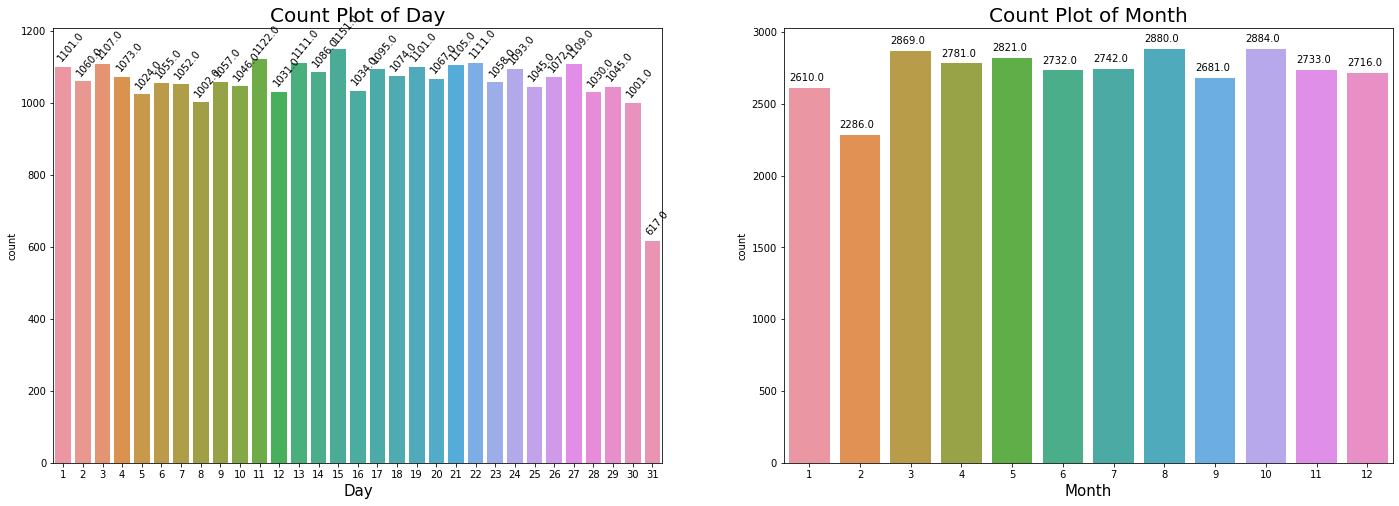

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

ax1 = sns.countplot(x="day", data=data, ax=ax[0])

for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+15), rotation=50)
ax1.set_xlabel('Day', size=15)
ax1.set_title('Count Plot of Day', size=20)
    
ax2 = sns.countplot(x="month", data=data, ax=ax[1])

for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))
ax2.set_xlabel('Month', size=15)
ax2.set_title('Count Plot of Month', size=20)

plt.show();

Any specific day(s) of month have more data than other days?

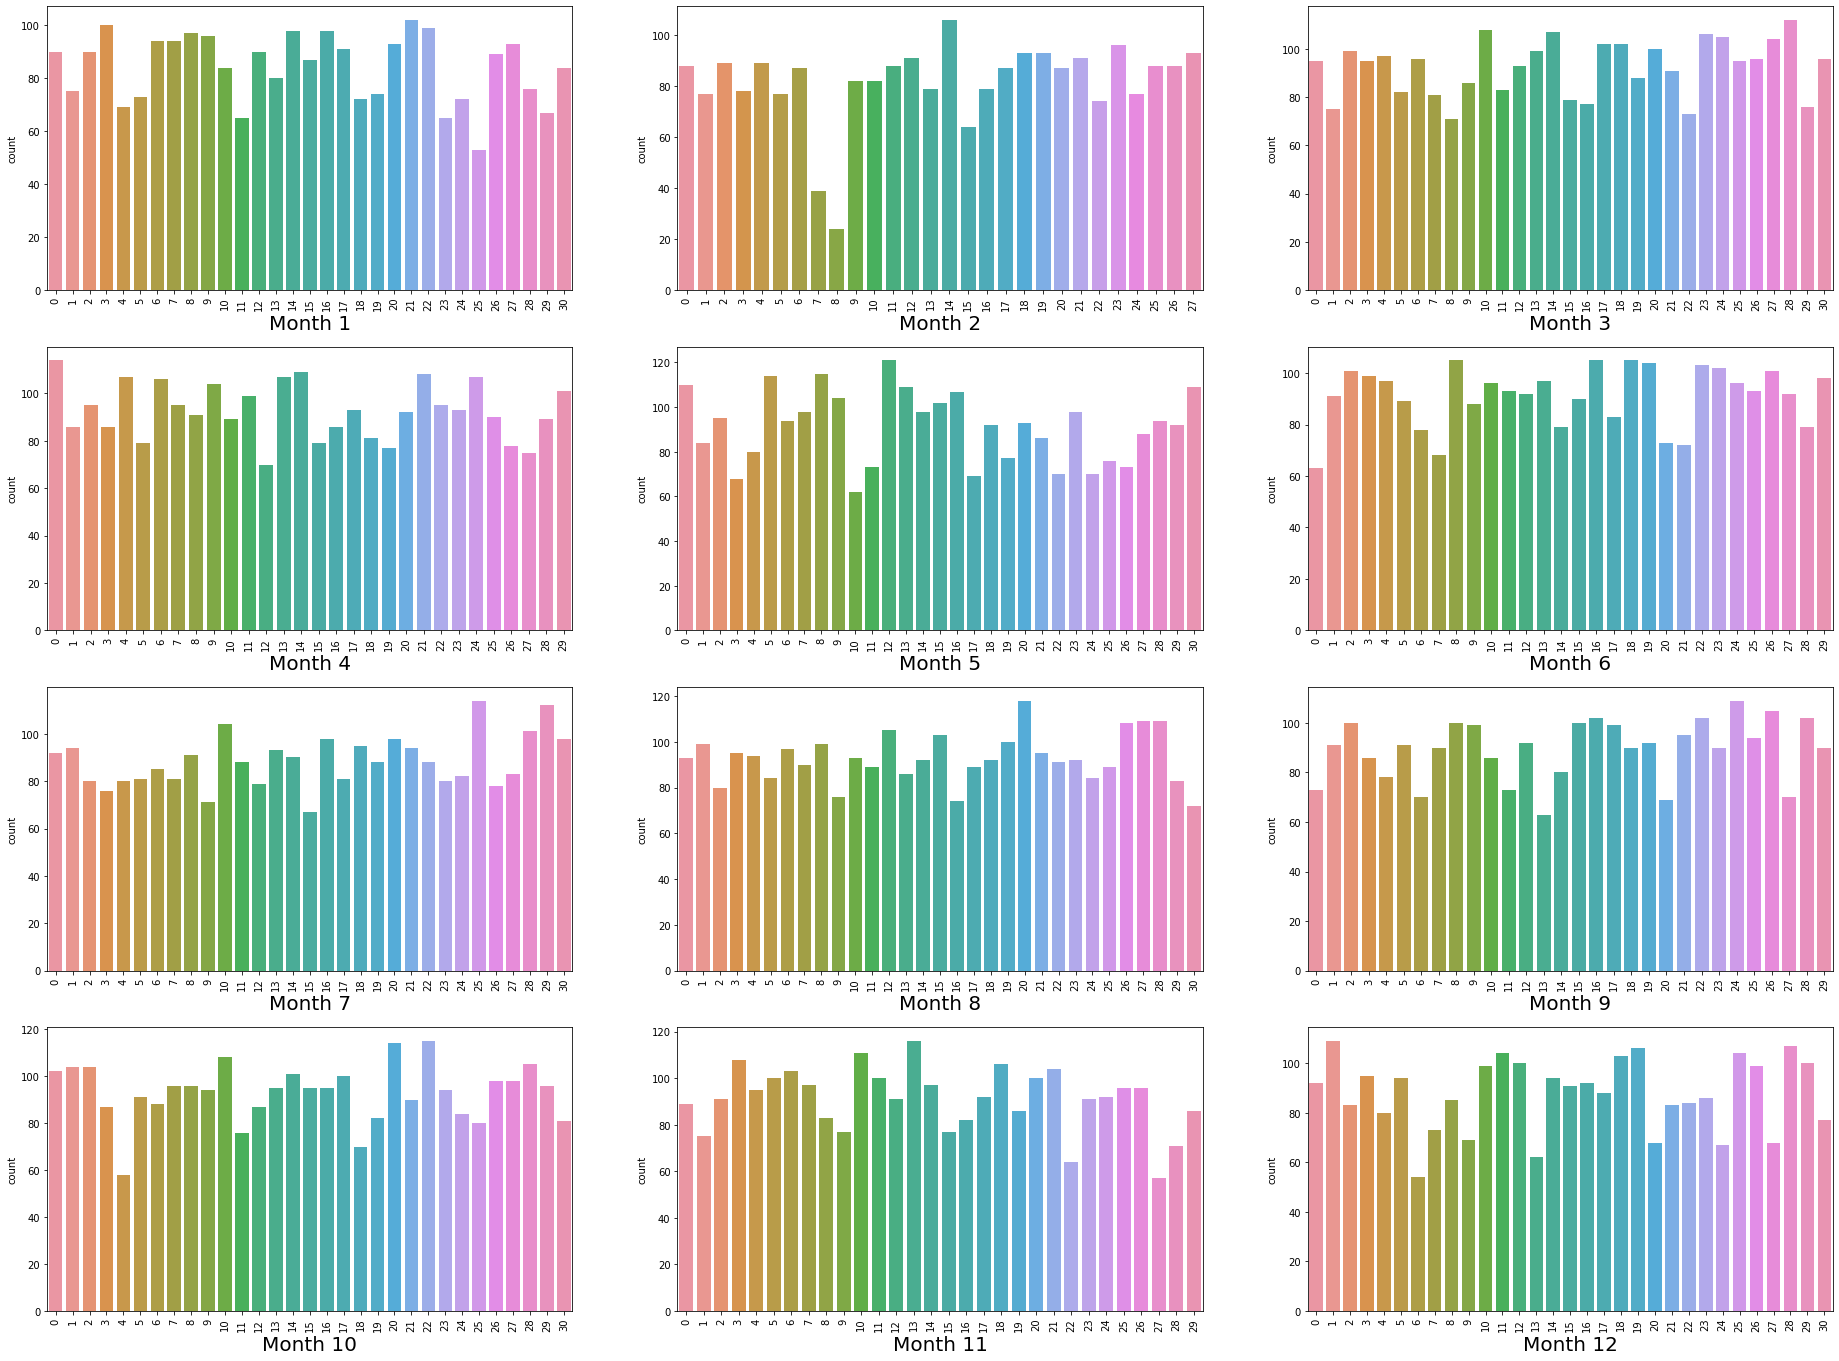

In [98]:
fig, ax = plt.subplots(4, 3, figsize=(8*4, 24))

for i in range(12):
    
    row, col = i//3, i%3

    plot = sns.countplot(x="day", data=data[data['month']==i+1], ax=ax[row][col])
    plot.set_xticklabels(plot.get_xticks(), rotation=90)
    plot.set_xlabel('Month {}'.format(i+1), size=20)

There seems to be no clear distinct patterns of days and months and they show quite similar distributions.

In [100]:
data[['day', 'month']].corr()

,day,month
day,1.000000,0.010448
month,0.010448,1.000000


And the correlation is also close to 0 and hence, it may be good to keep these two features.

---

In [101]:
data

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,10,8,752,-8,921,-28,9E,N8505Q,3611,JFK,PIT,63,340,7,52
32731,7,7,812,-3,1043,8,DL,N6713Y,1429,JFK,LAS,286,2248,8,12
32732,9,3,1057,-1,1319,-19,UA,N77871,1545,EWR,IAH,180,1400,10,57
32733,10,15,844,56,1045,60,B6,N258JB,1273,JFK,CHS,93,636,8,44


---

origin & destination & tailnum & air time

In [105]:
data['tailnum'].value_counts()

N725MQ    59
N713MQ    53
N711MQ    48
N723MQ    47
N722MQ    46
          ..
N359AA     1
N5FBAA     1
N8631E     1
N278AT     1
N924WN     1
Name: tailnum, Length: 3490, dtype: int64

In [111]:
data['origin'].value_counts()

EWR    11771
JFK    10897
LGA    10067
Name: origin, dtype: int64

We can see there are only 3 origin airports and they are quite evenly distributed

In [112]:
data['dest'].value_counts()

ATL    1653
ORD    1588
LAX    1583
BOS    1470
CLT    1383
       ... 
JAC       2
PSP       2
CHO       1
EYW       1
ANC       1
Name: dest, Length: 102, dtype: int64

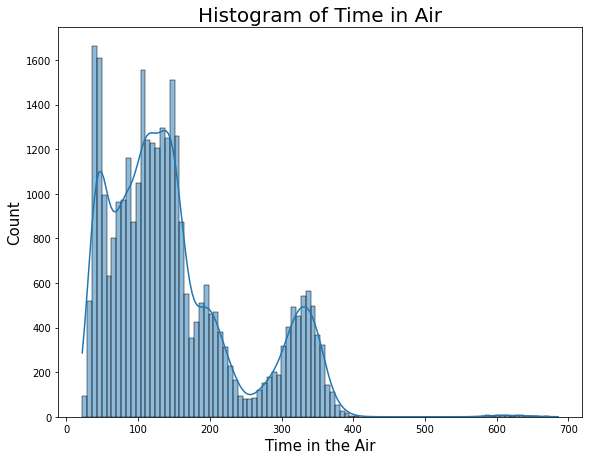

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.tight_layout()

sns.histplot(x='air_time', data=data, ax=ax, kde=True)

ax.set_title('Histogram of Time in Air', size=20)
ax.set_xlabel('Time in the Air', size=15)
ax.set_ylabel('Count', size=15)

plt.show();

**TODO**

1. Any relation between time in the air and tailnum or carrier?
2. Any relation between time in the air and origin&dest?
    1. Specific routes cause more time in the air?
3. ??

102 distinct destinations

---

dep_time & arr_time

In [114]:
data[['dep_time', 'arr_time', 'air_time']]

,dep_time,arr_time,air_time
0,940,1216,313
1,1657,2104,216
2,859,1238,376
3,1841,2122,135
4,1102,1230,50
...,...,...,...
32730,752,921,63
32731,812,1043,286
32732,1057,1319,180
32733,844,1045,93


---

**TODO**

1. Because departure time and arrival time are in Eastern and Local time, converting them into one specific time (UTF, for example) would be ideal.
    - But do we really need to do this? since we have air_time that records how long a plane is in the air.
    - 
2. ???

---

---

---